<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#План-выполнения-проекта" data-toc-modified-id="План-выполнения-проекта-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>План выполнения проекта</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Описание данных

Набор данных находится в файле `/datasets/insurance.csv.`

* **Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.
* **Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

## План выполнения проекта

1. Загрузить и изучить данные.
2. Обосновать решение и ответ на вопрос  "Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)"
 * **a.** Если изменится. Привести примеры матриц.
 * **b.** Если не изменится. Указать, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
3. Предложить алгоритм преобразования данных для решения задачи. Обосновать, почему качество линейной регрессии не поменяется.
4. Запрограммировать алгоритм пребразования, применив матричные операции. Проверить изменится ли качество линейной регрессии из `sklearn` до и после преобразования. Для оценки применить метрику `R2`.

## Загрузка данных

In [1]:
# импорт библиотек для выполения проекта
import pandas as pd
import numpy as np

# функции лин.алгебры
from numpy.linalg import inv

# графика
import seaborn as sns
import matplotlib.pyplot as plt

# импортируем функции и метрики из библиотеки sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# предупреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
# настроим отображение чисел и таблиц
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 200)
pd.set_option('display.width', 500)
# выберем общее формление для графиков
sns.set(style="white", palette="Spectral")

In [3]:
def load_data(file_name):
    '''функция загрузки файлов'''
    try:
        folder_path = './'
        file_path = folder_path +'/'+ file_name + '.csv'
        data = pd.read_csv(file_path)
    except:
        folder_path = 'https://link/datasets'
        file_path = folder_path +'/'+ file_name + '.csv'
        data = pd.read_csv(file_path)
        
    return data

In [4]:
def data_info(data_name):
    """функция выводит информацию о данных"""
    print('\nИнформация о данных\n')
    display(data_name.info())

    print('\n\nДанные из выборки\n')
    display(data_name.head(5))
    display(data_name.tail(5))

    print(f'\n\nКоличество признаков: {data_name.shape[1]}')
    print(f'\nКоличество наблюдений: {data_name.shape[0]}\n')
    
    for item in data_name.columns:
        print(f'\nКоличество уникальных значений признака {item} : {data_name[item].nunique()}')
    
    print('\n\nКоличество пропусков в данных')
    display(data_name.isna().sum())

    print(f'\n\nКоличество полных дубликатов в данных: {data_name.duplicated().sum()}')


    print('\n\nОписательная статистика ')
    display(data_name.describe())
    
    # визуализируем матрицу корреляции
    mask = np.triu(np.ones_like(data_name.corr(), dtype=bool));
    sns.heatmap(data_name.corr(), mask=mask,
              annot=True, 
              fmt=".3f", 
              linewidth=.5).set(title='Матрица корреляции признаков');


Информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None



Данные из выборки



,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0000,49600.0000,1,0
1,0,46.0000,38000.0000,1,1
2,0,29.0000,21000.0000,0,0
3,0,21.0000,41700.0000,2,0
4,1,28.0000,26100.0000,0,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4995,0,28.0000,35700.0000,2,0
4996,0,34.0000,52400.0000,1,0
4997,0,20.0000,33900.0000,2,0
4998,1,22.0000,32700.0000,3,0
4999,1,28.0000,40600.0000,1,0




Количество признаков: 5

Количество наблюдений: 5000


Количество уникальных значений признака Пол : 2

Количество уникальных значений признака Возраст : 46

Количество уникальных значений признака Зарплата : 524

Количество уникальных значений признака Члены семьи : 7

Количество уникальных значений признака Страховые выплаты : 6


Количество пропусков в данных


Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64



Количество полных дубликатов в данных: 153


Описательная статистика 


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,0.4990,30.9528,39916.3600,1.1942,0.1480
std,0.5000,8.4408,9900.0836,1.0914,0.4632
min,0.0000,18.0000,5300.0000,0.0000,0.0000
25%,0.0000,24.0000,33300.0000,0.0000,0.0000
50%,0.0000,30.0000,40200.0000,1.0000,0.0000
75%,1.0000,37.0000,46600.0000,2.0000,0.0000
max,1.0000,65.0000,79000.0000,6.0000,5.0000


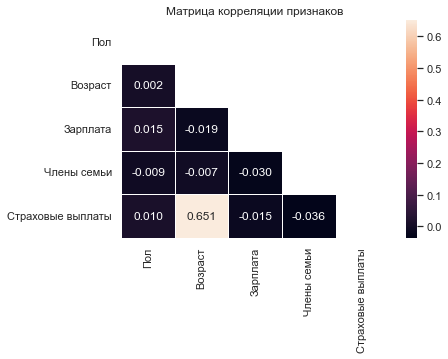

In [5]:
df = load_data('insurance')
data_info(df)

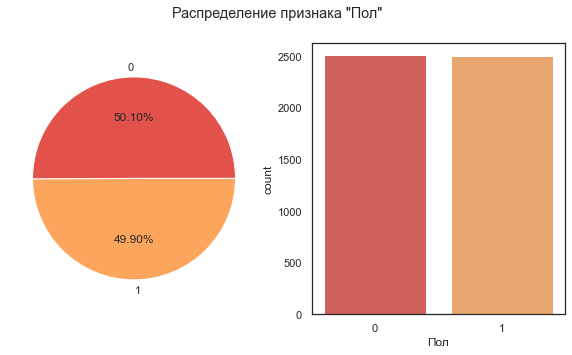

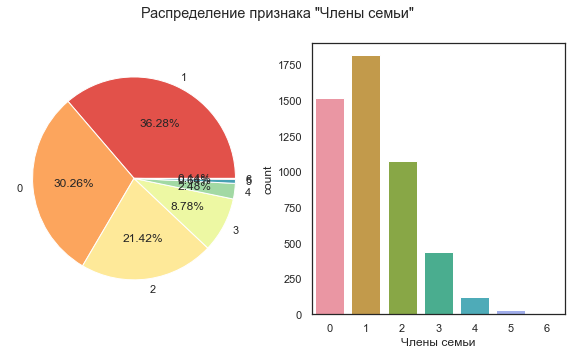

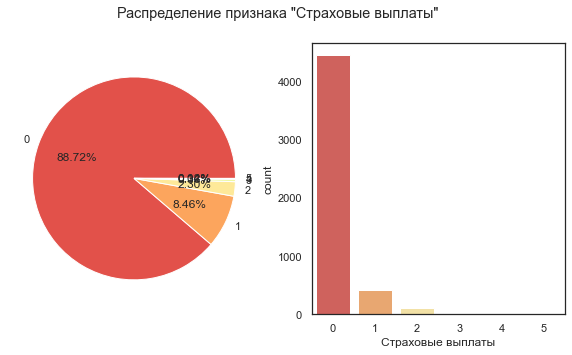

In [6]:
# построим распределение категориальных признаков
for item in ['Пол', 'Члены семьи', 'Страховые выплаты']:
    df_item = pd.DataFrame(df[item].value_counts())
    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    fig. suptitle(f'Распределение признака "{item}"')
    axs[0].pie(df_item[item], 
               labels= df_item.index, 
               autopct='%.2f%%')
    sns.countplot(data=df, x=item,ax=axs[1])
    #    axs[1].plot(df_item[item], kind='bar')
    plt.show()

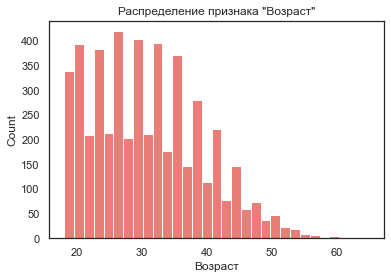

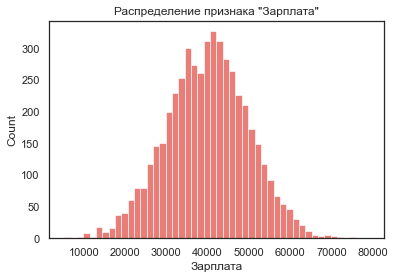

In [7]:
# построим распределение числовых признаков
for item in ['Возраст', 'Зарплата']:
    sns.histplot(x=item, data=df, bins='auto')
    plt.title(f'Распределение признака "{item}"')
    plt.show()

**Вывод:**

* К изучению представлены данные содержащие 5000 записей, описываемых 5 признаками.
* Пропусков в данных нет.
* Выявлены полные дубликаты в количестве 153 шт. Но так как данные не имеют у нам уникального идентификатора (ФИО, ID), т.е. мы не можем остоверно утверждать, что это именно полные дубликаты. Следовательно, вполне допустимо наличие таких дублей в данных. Удалять мы их не будем.
* При создании модели ML, в качестве целевого признака следует использовать признак "Страховые выплаты". На лицо явный дисбаланс классов.
* Корреляции между фичами не выявлено. Имеется корреляция между признаком "Возраст" и целевым признаком "Страховые выплаты"

## Умножение матриц

Обосновать решение и ответ на вопрос:
"Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)"

 * **a.** Если изменится. Привести примеры матриц.
 * **b.** Если не изменится. Указать, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Обоснование:** 
Рассмотрим задачу в общем виде.

Матрица $P$ является по условию задачи обратимой, следовательно
* матрица $P$ является квадратной размера $n$ ($n$ - размерность признаков)
* для нее существует матрица $P^{-1}$, и выполняется равенство:
    $$P^{-1} \cdot P = P \cdot P^{-1} = E$$

По условию матрица признаков $X$ умножается на матрицу $P$.

Тогда предсказание определяется по формуле:

$$a^p = X \cdot P \cdot w^p,$$ 

где $w^p = \Big((X \cdot P)^T \cdot (X \cdot P)\Big)^{-1} (X \cdot P)^T \cdot y$

Воспользуемся следующими свойствами матриц и матричных операций:
* ассоциативности $A(BC)=(AB)C$
* $(AB)^T=B^T A^T$
* $(A^{-1})^T=(A^T)^{-1}$, если существует $A^{-1}$ 
* $AE = EA = A$, где $E$ - единичная матрица
* $(AB)^{-1} = B^{-1} A^{-1}$, если существуют $B^{-1}$ и $A^{-1}$



$$ 
a^p = X_{m,n} \cdot P_{n,n} \cdot w_n^p$$ 

Преобразуем выражение
$$
a^p = X_{m,n} \cdot P_{n,n} \Big((X_{m,n} \cdot P_{n,n})^T \cdot (X_{m,n} \cdot P_{n,n})\Big)^{-1} (X_{m,n} \cdot P_{n,n})^T \cdot y_{n,1} =$$ 

$$ 
= X_{m,n} \cdot P_{n,n} \cdot \Big(\underbrace{P_{n,n}^T \cdot X_{m,n}^T \cdot X_{m,n}}_{n,n} \cdot P_{n,n}\Big)^{-1} \cdot P_{n,n}^T \cdot X_{m,n}^T \cdot y_{m}=
$$

$$ 
= X_{m,n} \cdot \underbrace{P_{n,n} \cdot P_{n,n}^{-1}}_{E_{n,n}} \cdot
\Big(P_{n,n}^T \cdot \underbrace{X_{m,n}^T \cdot X_{m,n}}_{n,n}\Big)^{-1} \cdot P_{n,n}^T \cdot X_{m,n}^T \cdot y_{m}=
$$

$$ 
= \underbrace{X_{m,n} \cdot E_{n,n}}_{X_{m,n}}  \cdot (X_{m,n}^T \cdot X_{m,n})^{-1} \cdot \underbrace{(P_{n,n}^T)^{-1} \cdot {P_{n,n}^T}}_{E_{n,n}}
\cdot X_{m,n}^T \cdot y_{m}=
$$

$$ 
= X_{m,n}  \cdot \underbrace{(X_{m,n}^T \cdot X_{m,n})^{-1} \cdot X_{m,n}^T \cdot y_{m}}_{w_{}} = X \cdot w = a
$$

Выше уже доказано, что $ a^{p} = a$

подставим исходное выражение, $X \cdot P \cdot w_p = X \cdot w$

Воспользуемся свойством единичной матрицы:

$$X \cdot P \cdot w_p = X \cdot \underbrace{P \cdot P^{-1}}_{E_{n,n}} \cdot w$$

Используя свойство ассоциативности расставим скобки для более удобного восприятия:
$$ (X \cdot P) \cdot w_p = (X \cdot P) \cdot P^{-1} \cdot w$$

Таким образом $ w_p = P^{-1} \cdot w$



**Ответ:** 
* При умножении признаков на обратимую матрицу качество линейной регрессии остается неизменным. 
* Параметры линейной регрессии в исходной задаче и в преобразованной связаны следующим соотношением: $ w_p = P^{-1} \cdot w$


## Алгоритм преобразования

**Алгоритм**

Учитывая вышеизложенное, для того, чтобы сохранить качество модели Линейной регресии, предлаю произвести умножение матрицы признаков $X$ на обратимую матрицу $P$. 

Генерацию матрицы $P$ провести случайным образом. Главное, чтобы выполнялось условие обратимости - матрицы должна быть **невырожденной** ($	\bigtriangleup P \neq 0$).

Блок схема алгоритма преобразования:

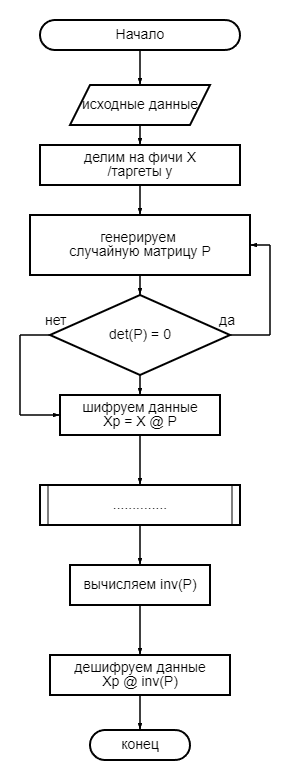

**Обоснование**

При умножениии матрицы признаков на обратимую матрицу, вектор параметров линейной регрессии $w_p=P^{-1}w$. 

При этом чтобы получить исходные признаки, т.е. расшифровать их, необхоодимо домножить матрицу преобразованных признаков на матрицу обратную $P$:
$$ X_p = X \cdot P$$
$$ X_p \cdot P^{-1} = X \cdot \underbrace{P \cdot P^{-1}}_{E_{n,n}}= X_{m,n} \cdot E_{n,n} = X_{m,n}$$

## Проверка алгоритма

In [8]:
# подготовим фичи и таргеты
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

In [9]:
features

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0000,49600.0000,1
1,0,46.0000,38000.0000,1
2,0,29.0000,21000.0000,0
3,0,21.0000,41700.0000,2
4,1,28.0000,26100.0000,0
...,...,...,...,...
4995,0,28.0000,35700.0000,2
4996,0,34.0000,52400.0000,1
4997,0,20.0000,33900.0000,2
4998,1,22.0000,32700.0000,3


In [10]:
target

0       0
1       1
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Страховые выплаты, Length: 5000, dtype: int64

Разделим выборки на обучающую и тестовую

In [11]:
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            test_size=0.20,
                                                                            random_state=2023)

Создадим модель `LinearRegression`, обучим ее на исходных данных и рассчитаем `R2`

In [12]:
#создадим пайплайн
reg = Pipeline([
    ('scale', StandardScaler()),
    ('linear', LinearRegression())
])

In [13]:
reg.fit(features_train, target_train)
r_2 = r2_score(target_test, reg.predict(features_test))

Создадим матриц случайным образом и проверим ее на обратимость

In [14]:
# создаем матрицу
N = features.shape[1] # размерность признаков
det_p = 0
while det_p == 0:
    p = np.random.rand(N, N) 
    # p= np.random.randint(20, 23, (N, N))
    det_p = np.linalg.det(p)
p_inv = inv(p)
print(f'Обратимая матрица P\n {p}')
print(f'\nОпределитель матрицы = {det_p}')
print(f'\nОбратная матрица для P\n {p_inv}')

Обратимая матрица P
 [[0.46842413 0.51379464 0.66932626 0.54764425]
 [0.36252745 0.31273969 0.73371237 0.06871418]
 [0.17025341 0.42135674 0.56751033 0.30839   ]
 [0.41391751 0.6158526  0.07925446 0.1801292 ]]

Определитель матрицы = 0.03939821854703015

Обратная матрица для P
 [[ 2.18958896  1.44246625 -4.52199153  0.53463453]
 [-2.13564422 -0.50525229  2.94167046  1.64942447]
 [-0.4006966   1.05780265  0.98999965 -0.88021733]
 [ 2.44652077 -2.05261931 -0.10195918 -0.92897642]]


Зашифруем наши признаки с помощью матрицы:

In [15]:
features_p = pd.DataFrame(features.values @ p)
features_p

,0,1,2,3
0,8460.3153,20913.2461,28179.3430,15299.6891
1,6486.7199,16026.5579,21599.2224,11722.1610
2,3585.8350,8857.5609,11938.9945,6478.1827
3,7108.0083,17578.3752,23680.7471,12861.6663
4,4454.2333,11006.6813,14833.2328,8051.4507
...,...,...,...,...
4995,6089.0255,15052.4239,20280.8211,11011.8073
4996,8934.0188,22090.3420,29762.5666,16162.1525
4997,5779.6691,14291.4799,19253.4328,10456.1556
4998,5576.9724,13787.6069,18574.6364,10086.9528


Разделим выборки на обучающую и тестовую

In [16]:
features_p_train, features_p_test, target_p_train, target_p_test = train_test_split(features_p, 
                                                                                    target,
                                                                                    test_size=0.20,
                                                                                    random_state=2023)

Создадим модель `LinearRegression` и обучим ее на зашифрованных признаках. Рассчитаем `R2`

In [17]:
reg_p = Pipeline([
    # масштабирует признаки
    ('scale', StandardScaler()),
    ('linear', LinearRegression())
])

In [18]:
reg_p.fit(features_p_train, target_p_train)
r_2_p = r2_score(target_p_test, reg_p.predict(features_p_test))

Посчитаем погрешность между двумя вариантами:

In [19]:
print(f'Погрешность вычисления R2 составляет: {abs(r_2 - r_2_p)}')

Погрешность вычисления R2 составляет: 4.884981308350689e-15


Разница между `R2`,рассчитаной на исходных признаках и на зашифрованных, признаках составляет менее $ 10^{-13}$, что можно списать на вычислительную погрешность.

Проверим, как расшифруются данные:

In [20]:
features_restored = pd.DataFrame(features_p @ p_inv)
features_restored

,0,1,2,3
0,1.0000,41.0000,49600.0000,1.0000
1,0.0000,46.0000,38000.0000,1.0000
2,0.0000,29.0000,21000.0000,0.0000
3,-0.0000,21.0000,41700.0000,2.0000
4,1.0000,28.0000,26100.0000,0.0000
...,...,...,...,...
4995,0.0000,28.0000,35700.0000,2.0000
4996,0.0000,34.0000,52400.0000,1.0000
4997,0.0000,20.0000,33900.0000,2.0000
4998,1.0000,22.0000,32700.0000,3.0000


In [21]:
features

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0000,49600.0000,1
1,0,46.0000,38000.0000,1
2,0,29.0000,21000.0000,0
3,0,21.0000,41700.0000,2
4,1,28.0000,26100.0000,0
...,...,...,...,...
4995,0,28.0000,35700.0000,2
4996,0,34.0000,52400.0000,1
4997,0,20.0000,33900.0000,2
4998,1,22.0000,32700.0000,3


Чтобы сравнить все ли данные обработались верно, вычтем из матрицы исходных признаков матрицу преобразованных

In [22]:
pd.DataFrame(abs(features.values - features_restored.values).round(2)).describe()

,0,1,2,3
count,5000.0000,5000.0000,5000.0000,5000.0000
mean,0.0000,0.0000,0.0000,0.0000
std,0.0000,0.0000,0.0000,0.0000
min,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,0.0000,0.0000
75%,0.0000,0.0000,0.0000,0.0000
max,0.0000,0.0000,0.0000,0.0000


Таким образом, мы получили идентичные данные.

**Вывод**

В ходе выполнения проекта были выполнены следующие этапы и сделаны следующие выводы.

1. Загружены и изучены данны.
2. Изучен вопрос об изменениии качества линейной регрессии при умножении признаков на обратимую матрицу. Получено теоретическое обоснование связи параметры модели до и после шифрования.

При этом основным условием, является обратимость матрицы.

3. Сформулирован алгоритм для шифрования и дешифрования данных. 
4. Предложенный алгоритм реализован в программном коде. Полученные результаты полностью соотвествуют теоретическим выводам. 
* Метрика `R2` не изменяется.
* Дешифровка данных произведена с помощью обратной матрицы. Дешифрованные данные полностью соответствуют исходным признакам.

